In [1]:
import main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
%matplotlib inline

In [2]:
def create_basemap( llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60, figsize=(16,9) ):
    fig=plt.figure( figsize = figsize )
    Bm = Basemap( projection='merc', 
                llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,
                llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,
                lat_ts=20,resolution='i' )
    # draw coastlines, state and country boundaries, edge of map.
    Bm.drawcoastlines(); 
    Bm.drawstates();
    Bm.drawcounties()
    Bm.drawcountries() 
    return Bm, fig

def create_map(df_full, df_nondup):
    Bm, fig = create_basemap(df_full['lat'].min()-1,df_full['lat'].max()+1, df_full['lon'].min()-1, df_full['lon'].max()+1 )
    x,y = Bm( df_full['lon'].values, df_full['lat'].values)                           
    Bm.scatter( x[::5], y[::5], marker = 'D',color = 'm', s = 10 )

    rain = df_nondup[df_nondup['Precipitation']==True]
    x2, y2 = Bm(rain['lon'].values, rain['lat'].values)
    Bm.scatter( x2, y2, marker = 'D',color = 'R', s = 80 )

    rain = df_nondup[df_nondup['RainAlert']==True]
    x2, y2 = Bm(rain['lon'].values, rain['lat'].values)
    Bm.scatter( x2, y2, marker = 'D',color = 'B', s = 400 )

    plt.show()

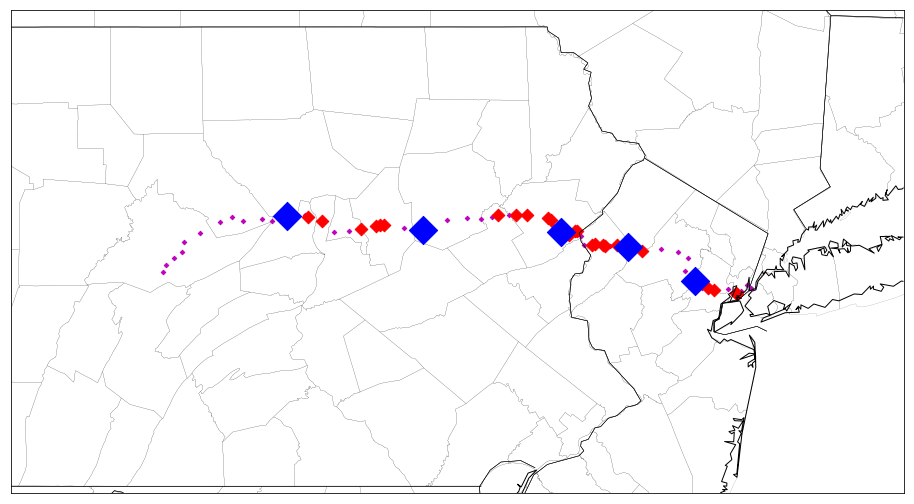

In [3]:
df_full, df_nondup = main.drive("State College, PA", "New York, NY")
create_map(df_full, df_nondup)